In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
file_path = r'C:\Studie\DC3\JBG060-group9\data\all_africa_southsudan.csv'

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

In [14]:
df.head()

,title,date,paragraphs,publisher
0,South Sudan: A Former Child Soldier Fights to ...,2021-02-12,"Sara, who was abducted at age 12, spent two ye...",Thomson Reuters Foundation (London)
1,South Sudan: #budget2019 - Will It Lead to Mor...,2019-02-21,Legal claims against the department now amount...,Bhekisisa (Johannesburg)
2,South Sudan: Retired NBA Star Elected Basketba...,2019-11-25,Former NBA star Luol Ajou Deng has been electe...,The East African (Nairobi)
3,"South Sudan - Political Violence On the Rise, ...",2022-02-11,UN human rights experts have warned of increas...,UN News Service
4,South Sudan: S. Sudan Receives First Astrazene...,2021-03-25,"Juba — South Sudan on Thursday received 132,00...",The East African (Nairobi)


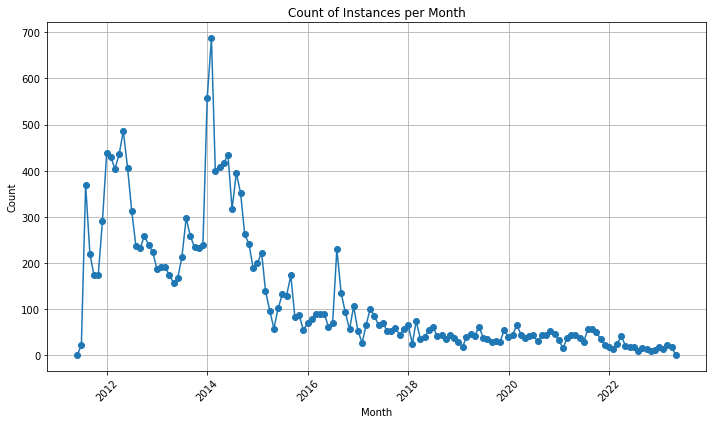

In [19]:
df.index = pd.to_datetime(df.index)

# Resample the data by month and count the instances per month
monthly_counts = df.resample('M').size()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Count of Instances per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

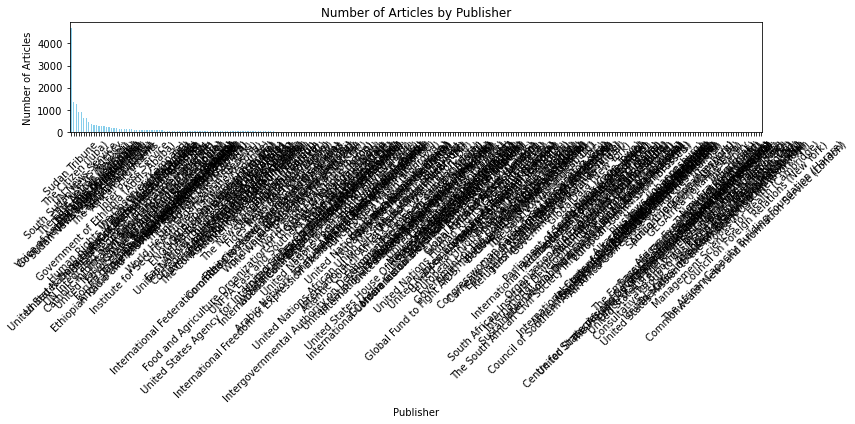

In [20]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
publisher_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Publisher')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.tight_layout()

# Show the plot (if you're using a Jupyter Notebook, this step may be unnecessary)
plt.show()

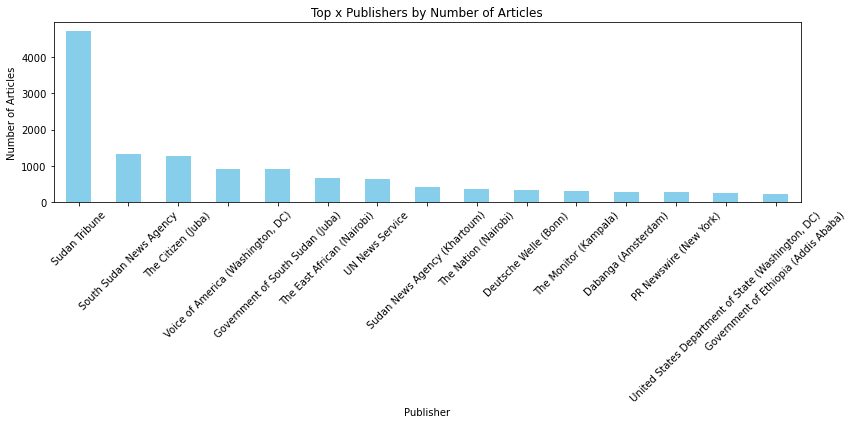

In [24]:
publisher_counts = df['publisher'].value_counts()
x = 15
# Select the top x most frequent publishers
top_x_publishers = publisher_counts.head(x)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
top_x_publishers.plot(kind='bar', color='skyblue')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.title('Top x Publishers by Number of Articles')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.tight_layout()

# Show the plot (if you're using a Jupyter Notebook, this step may be unnecessary)
plt.show()

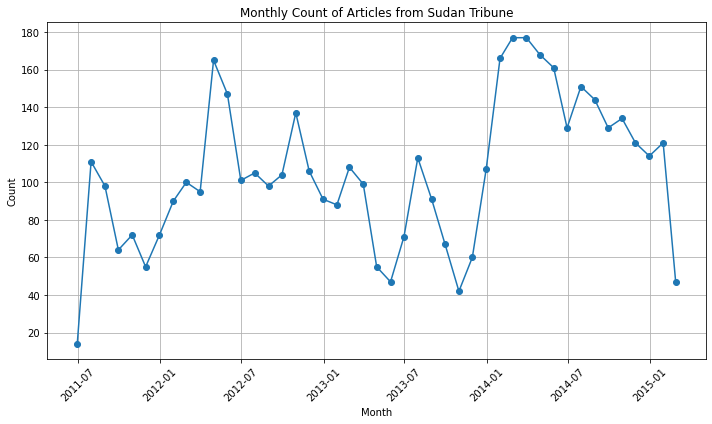

In [26]:
sudan_tribune_df = df[df['publisher'] == 'Sudan Tribune']

# Convert the 'date' index to a datetime object
sudan_tribune_df.index = pd.to_datetime(sudan_tribune_df.index)

# Resample the data by month and count the instances per month
monthly_counts = sudan_tribune_df.resample('M').size()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Monthly Count of Articles from Sudan Tribune')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

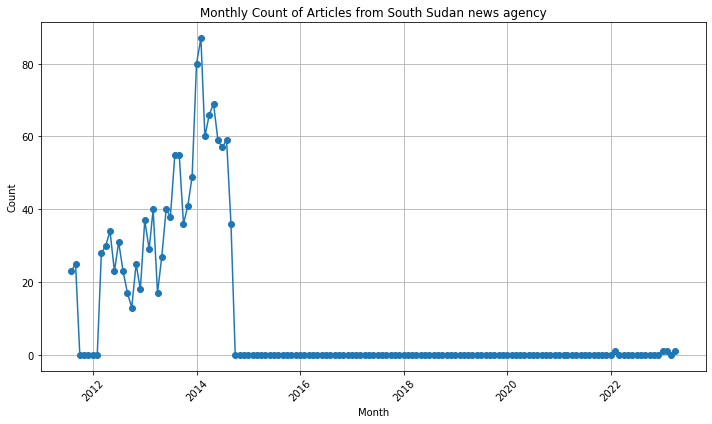

In [32]:
sudan_news_agency_df = df[df['publisher'] == 'South Sudan News Agency']

# Convert the 'date' index to a datetime object
sudan_news_agency_df.index = pd.to_datetime(sudan_news_agency_df.index)

# Resample the data by month and count the instances per month
monthly_counts = sudan_news_agency_df.resample('M').size()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Monthly Count of Articles from South Sudan news agency')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [27]:
newest_article = sudan_tribune_df[sudan_tribune_df.index == sudan_tribune_df.index.max()]

# Print or access the newest article's details
print(newest_article)

                                                        title  \
date                                                            
2015-02-16  South Sudan: Why Government Is Right to Postpo...   

                                                   paragraphs      publisher  
date                                                                          
2015-02-16  The decision of the Council of Ministers to in...  Sudan Tribune  


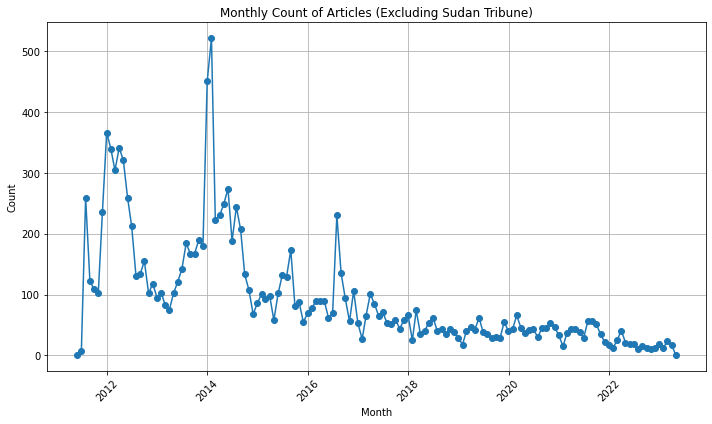

In [29]:
filtered_df = df[df['publisher'] != 'Sudan Tribune']

# Convert the 'date' index to a datetime object
filtered_df.index = pd.to_datetime(filtered_df.index)

# Resample the data by month and count the instances per month
monthly_counts = filtered_df.resample('M').size()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Monthly Count of Articles (Excluding Sudan Tribune)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

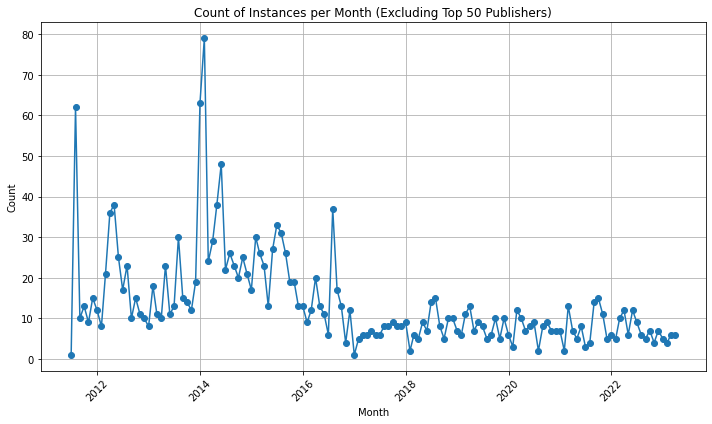

In [38]:
# Sort the DataFrame by publisher article count in descending order
publisher_counts = df['publisher'].value_counts().sort_values(ascending=False)

# Get the top 50 publishers to exclude
top_publishers_to_exclude = publisher_counts.head(50).index.tolist()

# Filter the DataFrame to exclude articles from the top 50 publishers
filtered_df = df[~df['publisher'].isin(top_publishers_to_exclude)]

# Resample the filtered data by month and count the instances per month
monthly_counts = filtered_df.resample('M').size()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Count of Instances per Month (Excluding Top 50 Publishers)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [39]:
Seasonality: Avarge articles per month and avarage atricles from 2016 onwards:

SyntaxError: invalid syntax (<ipython-input-39-3428aa21a276>, line 1)

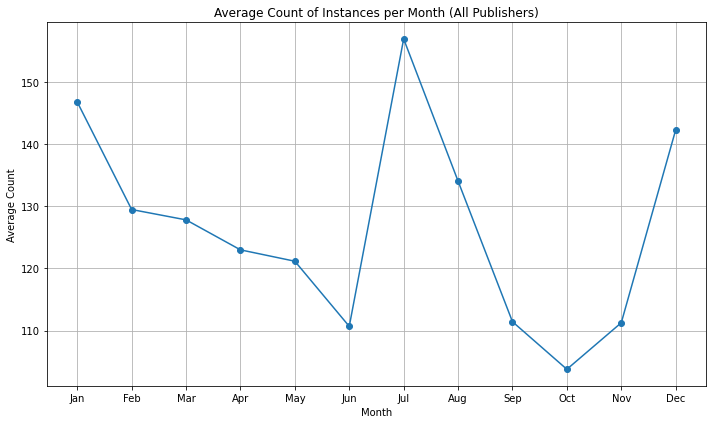

In [41]:
monthly_counts = df.resample('M').size()

# Calculate the average count per month
monthly_avg = monthly_counts.groupby(monthly_counts.index.month).mean()

# Create a line plot for the average count per month
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
plt.title('Average Count of Instances per Month (All Publishers)')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

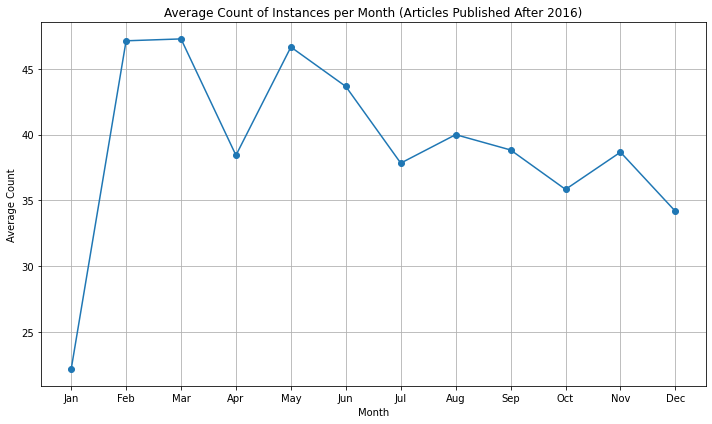

In [48]:
# Filter the DataFrame to include only articles published later than 2016
df_filtered = df[df.index.year > 2016]

# Resample the filtered data by month and count the instances per month
monthly_counts = df_filtered.resample('M').size()

# Calculate the average count per month
monthly_avg = monthly_counts.groupby(monthly_counts.index.month).mean()

# Create a line plot for the average count per month
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
plt.title('Average Count of Instances per Month (Articles Published After 2016)')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

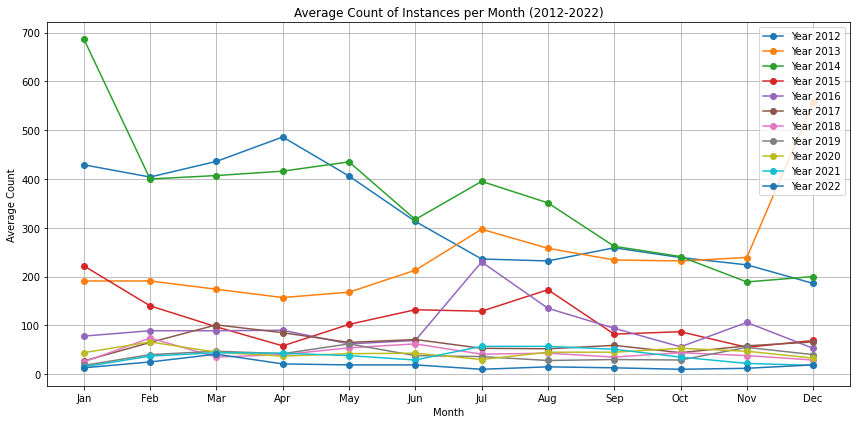

In [54]:
# Assuming 'df' is your DataFrame with a datetime index

# Resample the data by month and count the instances per month
monthly_counts = df.resample('M').size()

# Create a DataFrame with the monthly counts and the corresponding years
monthly_counts_df = pd.DataFrame({'Month': monthly_counts.index.month, 'Year': monthly_counts.index.year, 'Count': monthly_counts.values})

# Filter the data for years in the range 2012-2022
filtered_data = monthly_counts_df[(monthly_counts_df['Year'] >= 2012) & (monthly_counts_df['Year'] <= 2022)]

# Group the data by year and month and calculate the average count
yearly_avg = filtered_data.groupby(['Year', 'Month'])['Count'].mean().unstack()

# Create a line plot for each year
plt.figure(figsize=(12, 6))
for year in range(2012, 2023):
    if year in yearly_avg.index:
        year_data = yearly_avg.loc[year]
        plt.plot(year_data.index, year_data.values, marker='o', linestyle='-', label=f'Year {year}')

plt.title('Average Count of Instances per Month (2012-2022)')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()

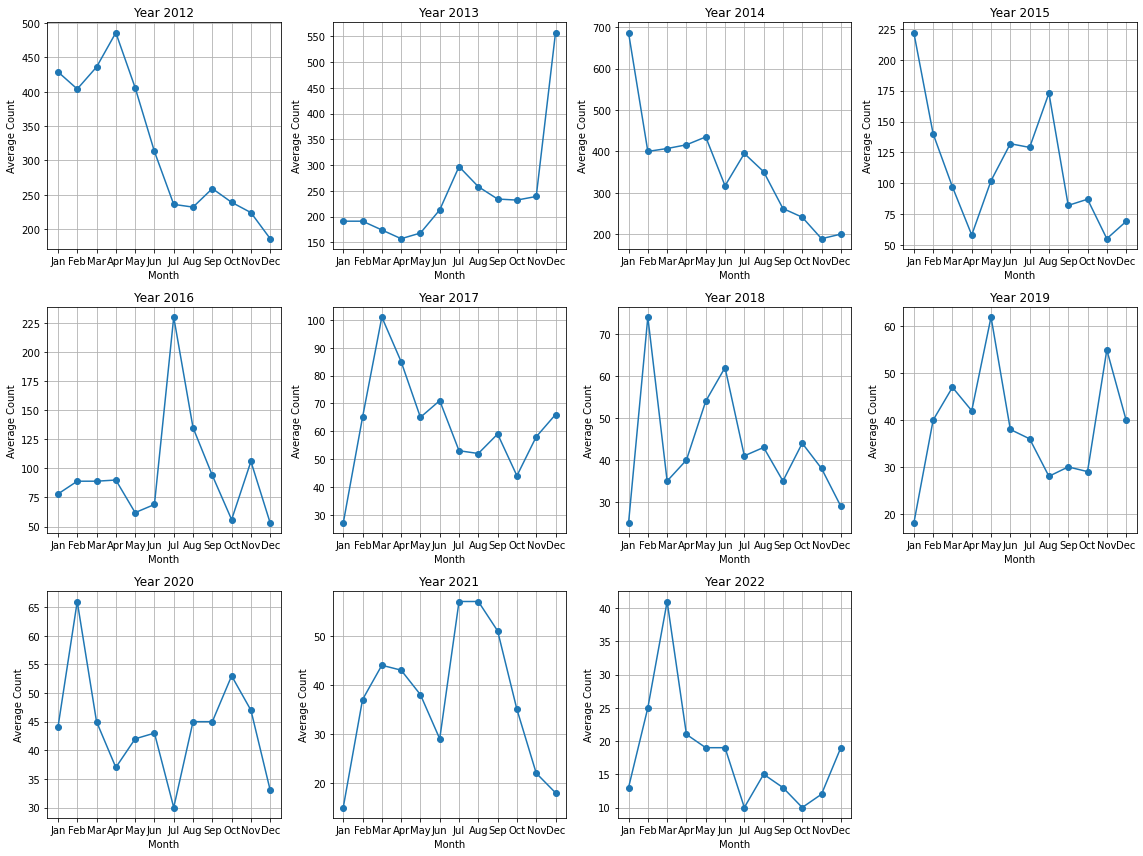

In [55]:
# Resample the data by month and count the instances per month
monthly_counts = df.resample('M').size()

# Create a DataFrame with the monthly counts and the corresponding years
monthly_counts_df = pd.DataFrame({'Month': monthly_counts.index.month, 'Year': monthly_counts.index.year, 'Count': monthly_counts.values})

# Filter the data for years in the range 2012-2022
filtered_data = monthly_counts_df[(monthly_counts_df['Year'] >= 2012) & (monthly_counts_df['Year'] <= 2022)]

# Group the data by year and month and calculate the average count
yearly_avg = filtered_data.groupby(['Year', 'Month'])['Count'].mean().unstack()

# Create a grid of subplots, one for each year
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)
for i, year in enumerate(range(2012, 2023)):
    if year in yearly_avg.index:
        ax = axes[i // 4, i % 4]
        year_data = yearly_avg.loc[year]
        ax.plot(year_data.index, year_data.values, marker='o', linestyle='-')
        ax.set_title(f'Year {year}')
        ax.set_xlabel('Month')
        ax.set_ylabel('Average Count')
        ax.grid(True)
        ax.set_xticks(range(1, 13))
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Remove empty subplots if the number of years is less than 12
if len(unique_years) < 12:
    for i in range(len(unique_years), 12):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()